In [1]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
#!pip install seaborn
#!pip install yellowbrick
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors, datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import missingno as msno
from tensorflow.keras.optimizers import SGD

In [43]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\BA\\part3\\data mining\\marketing_campaign.csv', sep='\t')

In [44]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


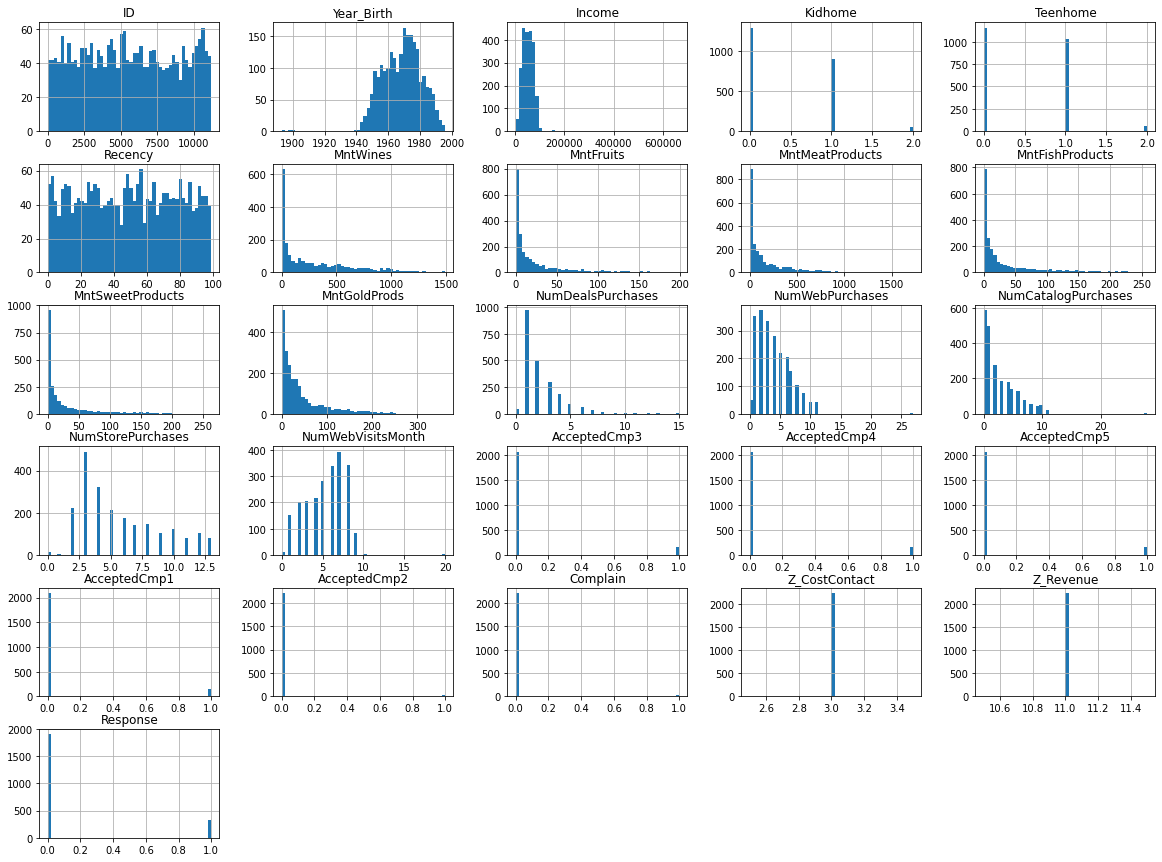

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#HANDLING CATEGORICAL DATA

In [45]:
# Applying one-hot encoding to the 'Education' categorical variable
from sklearn.preprocessing import OneHotEncoder
education_ohe = pd.get_dummies(df['Education'], prefix='Education')

# Adding the one-hot encoded columns to the main DataFrame
df = pd.concat([df, education_ohe], axis=1)

# Displaying the first few rows to verify the new columns
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,0,0,0,0,1


In [46]:
#LOOKING INTO DATA

In [47]:
df["Year_Birth"].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1968    51
1959    51
1954    50
1966    50
1960    49
1955    49
1982    45
1963    45
1967    44
1962    44
1951    43
1957    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64

In [48]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [49]:
df["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [12]:
df["Teenhome"].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [13]:
#MAKING NEW FEATURES

In [50]:
#Zohreh
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [51]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["days_a_customer"] = days #attribute name changed: df["Customer_For"] = days
df["days_a_customer"] = pd.to_numeric(df["days_a_customer"], errors="coerce")

In [52]:
#2020 is the oldest dataset update date. So we consider that as the analysis date
df["Age"] = 2020-df["Year_Birth"]

In [53]:
#Arash: creating marital status dictionary and replacing values in data frame?
unique_marital_strings = list(df['Marital_Status'].unique())
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [54]:
marital_status_dict = {'Single': 1 ,'Together': 2, 'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1, 'Absurd': np.NaN, 'YOLO': np.NaN}
df['adults_in_home'] = df['Marital_Status']
df['adults_in_home'] = df['adults_in_home'].map(lambda x : marital_status_dict.get(x))

In [55]:
#Zohreh
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Children"]=df["Kidhome"]+df["Teenhome"]
df["Family_Size"] = df['adults_in_home']+ df["Children"]
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]+df["Response"]
df["Unnecessary_Purchases"] = df["MntGoldProds"]+ df["MntWines"]+df["MntSweetProducts"]
df["Necessary_Purchases"] = df["MntFruits"]+ df["MntMeatProducts"]+df["MntFishProducts"]

In [56]:
#Taufiq
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [57]:
#HANDLING MISSING DATA

In [58]:
#Zohreh
print(df.isnull().sum())

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Education_2n Cycle        0
Education_Basic           0
Education_Graduation      0
Education_Master          0
Education_PhD             0
days_a_customer           0
Age                 

<AxesSubplot:>

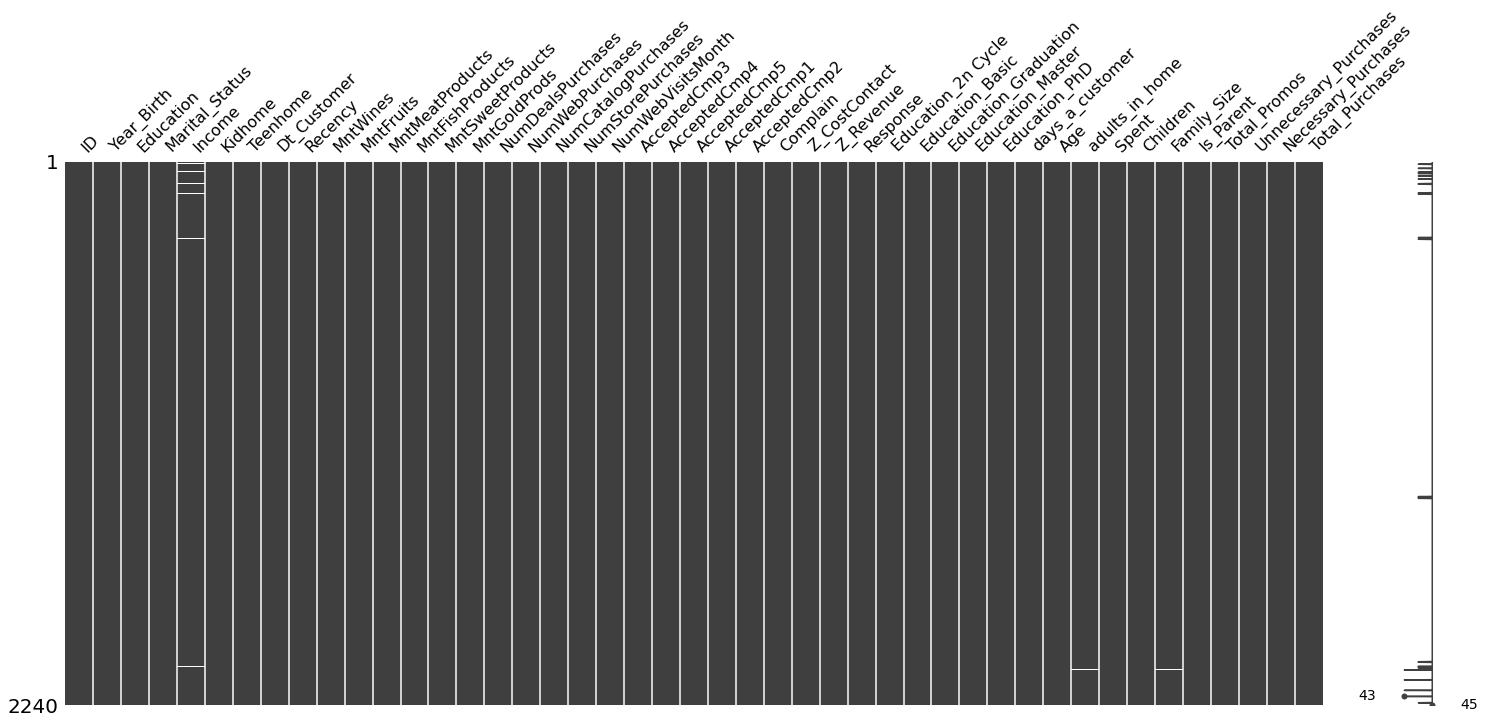

In [14]:
msno.matrix(df, )

In [24]:
#making decision to drop or replace

In [25]:
data1 = df['Income']
data1.dropna(inplace=True)

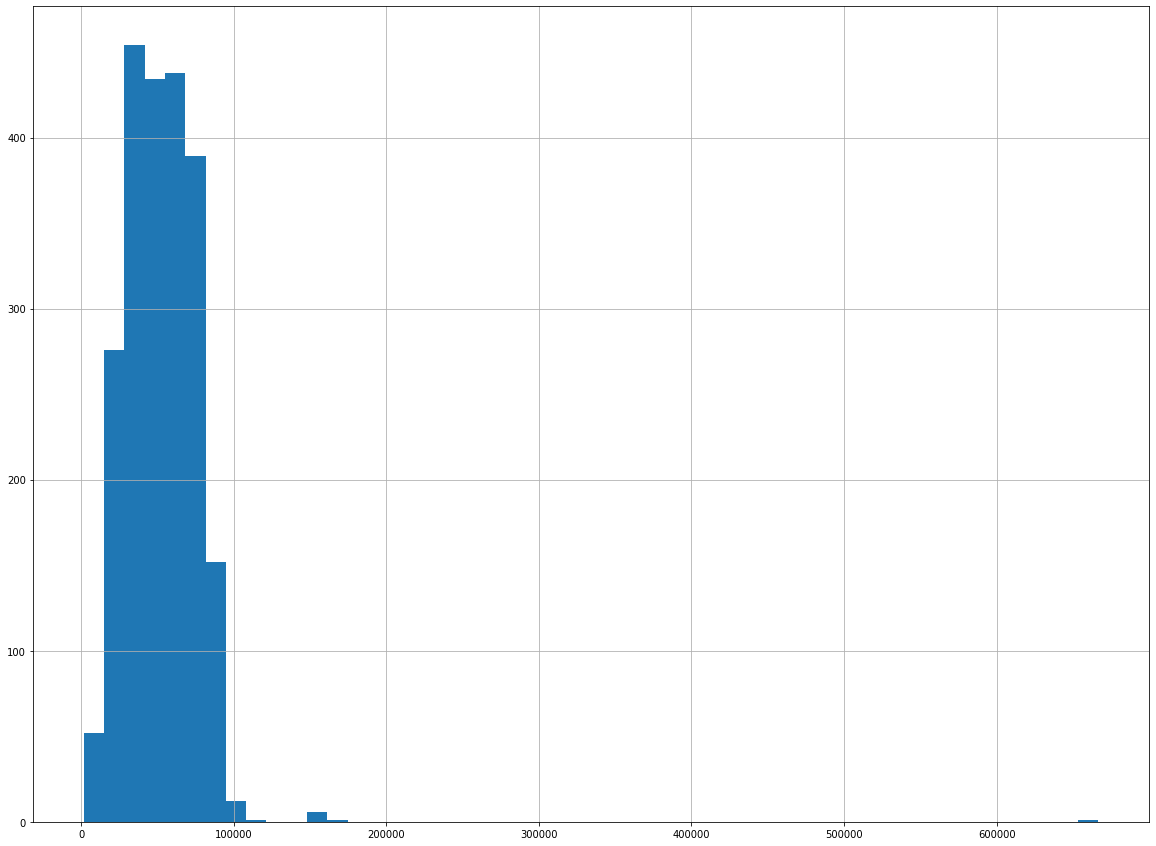

In [26]:
data1.hist(bins=50, figsize=(20,15))
plt.show()

In [94]:
print(data1.mean())
print(data1.median())

52247.25135379061
51381.5


In [95]:
data2 = df['Income']

data2.fillna(data2.median(), inplace=True)

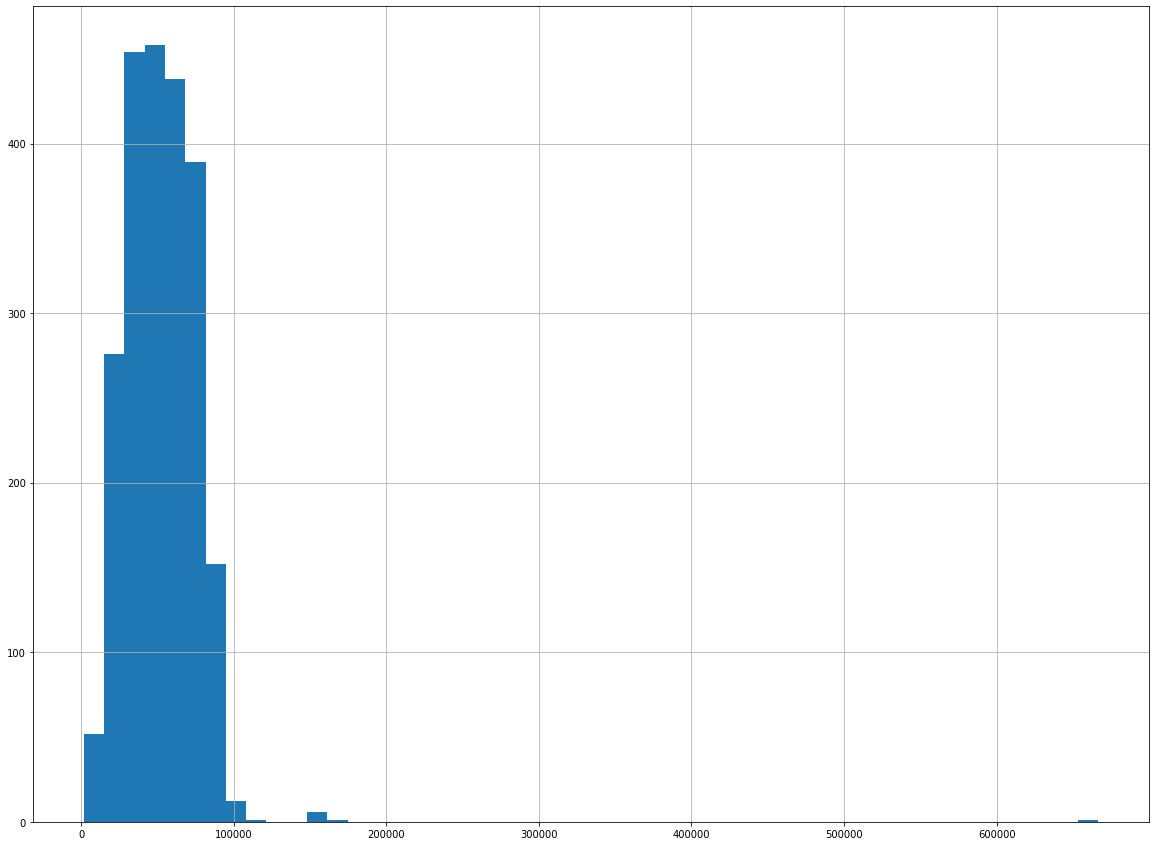

In [96]:
data2.hist(bins=50, figsize=(20,15))
plt.show()

In [97]:
print(data2.mean())
print(data2.median())

52237.97544642857
51381.5


In [59]:
df.dropna(subset=['Income'], inplace=True)
df.dropna(subset=['adults_in_home'], inplace=True)


In [16]:
print(df.isnull().sum())

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Education_2n Cycle       0
Education_Basic          0
Education_Graduation     0
Education_Master         0
Education_PhD            0
days_a_customer          0
Age                      0
adults_in_home           0
S

In [17]:
#making new feature after removing missing in income

In [60]:
df["IncomePer"] =df["Income"]/df["Family_Size"]

In [19]:
#REMOVING OUTLIER

In [61]:
#Zohreh
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [21]:
#removing features

In [22]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,adults_in_home,Spent,Children,Family_Size,Is_Parent,Total_Promos,Unnecessary_Purchases,Necessary_Purchases,Total_Purchases,IncomePer
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.00000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,5584.532609,1968.904438,51943.520833,0.442482,0.505888,49.057518,305.226902,26.298007,167.004076,37.527174,...,1.646739,606.903986,0.94837,2.595109,0.714674,0.447917,376.074728,230.829257,14.883605,24854.694995
std,3246.084196,11.697572,21536.756816,0.537112,0.544330,28.935531,337.606819,39.731780,224.316242,54.578404,...,0.478091,602.775960,0.74960,0.905610,0.451672,0.891995,379.879576,285.033144,7.675956,19470.210666
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,0.00000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,815.666667
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,1.750000,16.000000,3.000000,...,1.000000,69.000000,0.00000,2.000000,0.000000,0.000000,41.000000,25.000000,8.000000,12087.437500
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,174.000000,8.000000,68.000000,12.000000,...,2.000000,396.000000,1.00000,3.000000,1.000000,0.000000,246.000000,90.500000,15.000000,18607.166667
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.500000,33.000000,232.250000,50.000000,...,2.000000,1047.250000,1.00000,3.000000,1.000000,1.000000,617.000000,357.750000,21.000000,31931.500000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,2.000000,2525.000000,3.00000,5.000000,1.000000,5.000000,1689.000000,1727.000000,44.000000,153924.000000


In [62]:
#Zohreh
to_drop = ["Marital_Status", "Dt_Customer","Year_Birth",'Z_CostContact','Z_Revenue','Education','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df= df.drop(to_drop, axis=1)

In [24]:
#LOOKING INTO DATA AFTER PREPSOCESSING

array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='MntWines', ylabel='Income'>,
        <AxesSubplot:xlabel='MntFruits', ylabel='Income'>,
        <AxesSubplot:xlabel='MntMeatProducts', ylabel='Income'>,
        <AxesSubplot:xlabel='MntFishProducts', ylabel='Income'>,
        <AxesSubplot:xlabel='MntSweetProducts', ylabel='Income'>,
        <AxesSubplot:xlabel='MntGoldProds', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntWines', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntFruits', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntMeatProducts', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntFishProducts', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntSweetProducts', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntGoldProds', ylabel='MntWines'>],
       [<AxesSubplot:xlabel='Income', ylabel='MntFruits'>,
        <AxesSubplot:xlabel='MntWines', ylabel='MntFruits'>,
  

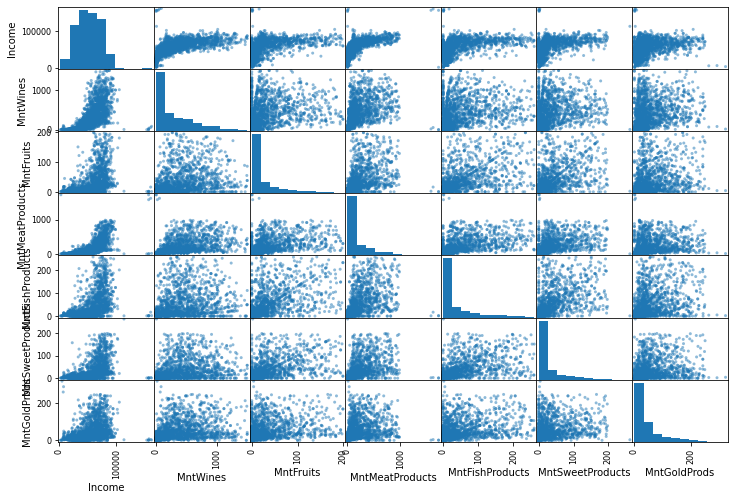

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["Income", "MntWines", "MntFruits",
 "MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [63]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Compute correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

                             ID    Income   Kidhome  Teenhome   Recency  \
ID                     1.000000  0.000643  0.001132 -0.003452 -0.044256   
Income                 0.000643  1.000000 -0.514493  0.035540  0.007575   
Kidhome                0.001132 -0.514493  1.000000 -0.039136  0.009557   
Teenhome              -0.003452  0.035540 -0.039136  1.000000  0.015844   
Recency               -0.044256  0.007575  0.009557  0.015844  1.000000   
MntWines              -0.019116  0.688354 -0.497392  0.004033  0.016000   
MntFruits              0.009674  0.506734 -0.373287 -0.174537 -0.006366   
MntMeatProducts       -0.003372  0.692645 -0.439483 -0.260523  0.022253   
MntFishProducts       -0.022953  0.519832 -0.388779 -0.203210 -0.000495   
MntSweetProducts      -0.004711  0.523682 -0.378602 -0.162747  0.024313   
MntGoldProds          -0.008838  0.387383 -0.354501 -0.016032  0.017692   
NumDealsPurchases     -0.040768 -0.107866  0.217858  0.386207  0.004704   
NumWebPurchases       -0.

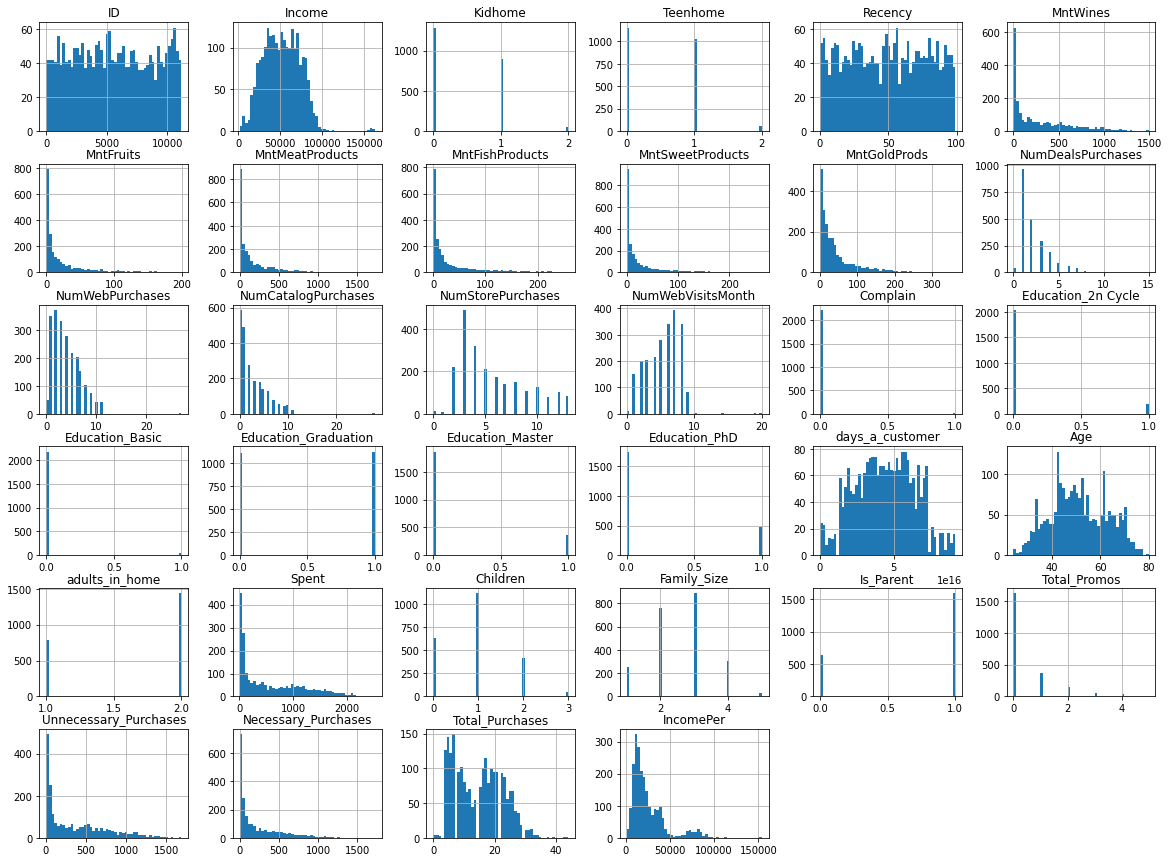

In [109]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [110]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,adults_in_home,Spent,Children,Family_Size,Is_Parent,Total_Promos,Unnecessary_Purchases,Necessary_Purchases,Total_Purchases,IncomePer
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,5588.393817,51937.477599,0.444892,0.506720,49.154122,304.065412,26.244624,166.957885,37.415771,27.099014,...,1.646057,605.624104,0.951613,2.597670,0.715502,0.446237,375.005824,230.618280,14.864695,24816.493044
std,3243.397549,21420.681136,0.538613,0.544686,28.949677,336.871724,39.711783,225.752900,54.456115,41.320001,...,0.478299,602.123276,0.752338,0.906846,0.451276,0.890094,379.137821,285.968687,7.682142,19398.504498
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,815.666667
25%,2828.250000,35434.750000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,1.000000,69.000000,0.000000,2.000000,0.000000,0.000000,41.000000,25.000000,8.000000,12160.875000
50%,5454.500000,51381.500000,0.000000,0.000000,49.500000,173.000000,8.000000,67.000000,12.000000,8.000000,...,2.000000,396.000000,1.000000,3.000000,1.000000,0.000000,245.000000,90.000000,15.000000,18586.666667
75%,8421.750000,68275.750000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,...,2.000000,1044.250000,1.000000,3.000000,1.000000,1.000000,616.000000,356.000000,21.000000,31910.375000
max,11191.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,2.000000,2525.000000,3.000000,5.000000,1.000000,5.000000,1689.000000,1727.000000,44.000000,153924.000000


In [64]:
df['Total_Promos'].value_counts()

0    1606
1     367
2     139
3      50
4      36
5      10
Name: Total_Promos, dtype: int64

In [112]:
#classification

In [67]:
prp=preprocessing.StandardScaler()

In [68]:
from imblearn.over_sampling import SMOTE
X_classification2=df.copy()
X_classification2_dict = {0:0 ,1:1,2:1,3:1,4:1,5:1}
X_classification2['Total_Promos'] = X_classification2['Total_Promos'].map(lambda x : X_classification2_dict.get(x))
Y_classification2=pd.DataFrame(X_classification2['Total_Promos'])
X_classification2= X_classification2.drop(['Total_Promos','Income','ID'], axis=1)


In [69]:
file_path = 'C:\\Users\\Admin\\Desktop\\BA\\part3\\data mining\\marketing_campaign1.csv'
df.to_csv(file_path, index=False)

In [70]:
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_classification2,Y_classification2)

In [71]:
y_balanced['Total_Promos'].value_counts()

1    1606
0    1606
Name: Total_Promos, dtype: int64

In [72]:
X_train2, X_test2, y_train2, y_test2=model_selection.train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
X_train2=prp.fit_transform(X_train2)
X_test2=prp.transform(X_test2)

In [129]:
feature_names = X_classification2.columns.tolist()
print(feature_names)

['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'days_a_customer', 'Age', 'adults_in_home', 'Spent', 'Children', 'Family_Size', 'Is_Parent', 'Unnecessary_Purchases', 'Necessary_Purchases', 'Total_Purchases', 'IncomePer']


In [74]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train2, y_train2)

SVC(kernel='linear', random_state=42)

In [75]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       319
           1       0.91      0.71      0.80       324

    accuracy                           0.82       643
   macro avg       0.83      0.82      0.81       643
weighted avg       0.83      0.82      0.81       643



In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train2, y_train2)

# Make predictions
y_pred = classifier.predict(X_test2)

# Evaluate the classifier
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       319
           1       0.82      0.83      0.83       324

    accuracy                           0.82       643
   macro avg       0.82      0.82      0.82       643
weighted avg       0.82      0.82      0.82       643



In [77]:
attribute_names = X_classification.columns.tolist()
importances = classifier.feature_importances_

# Assuming you have the attribute names stored in a list called 'attribute_names'
# Combine feature names and importances
feature_importance_dict = dict(zip(attribute_names, importances))

# Sort the dictionary by values in descending order
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted importances
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


MntWines: 0.23739605292228202
NumStorePurchases: 0.09053448155195179
MntGoldProds: 0.06965347116447197
days_a_customer: 0.05916996533817869
Teenhome: 0.058470385234270776
Recency: 0.055783841626757834
adults_in_home: 0.04395636179342234
Unnecessary_Purchases: 0.04355026392142508
IncomePer: 0.03728697764095449
Spent: 0.034831321949007336
Age: 0.03279502323031658
MntMeatProducts: 0.027779577443027323
NumWebVisitsMonth: 0.025675222610555035
Necessary_Purchases: 0.023932581673805572
MntFishProducts: 0.02105986347547432
MntSweetProducts: 0.020274248018265845
MntFruits: 0.018714509643280672
Total_Purchases: 0.01607091741318394
NumWebPurchases: 0.015200774803815183
NumDealsPurchases: 0.013394857199848367
Kidhome: 0.010137030600929235
Family_Size: 0.009397046063661117
Education_Graduation: 0.008956646297930249
NumCatalogPurchases: 0.007264524854935182
Children: 0.0063086917431911275
Education_Master: 0.005162316494118137
Is_Parent: 0.003497645589064095
Education_PhD: 0.002896201857196614
Educa

In [130]:
import math
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# Assuming X_train2 and X_test2 are already DataFrame
X_train2 = pd.DataFrame(X_train2)
X_test2 = pd.DataFrame(X_test2)

optimizer = SGD(learning_rate=0.05, momentum=0.9)  

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 unit for binary classification
])

# Define class weight
class_weight = {0: 0.6304, 1: 2.4157}

# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train2, y_train2, class_weight='balanced', epochs=45, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test2, y_test2)
print(f'Test accuracy: {test_accuracy}')

Train on 2055 samples, validate on 514 samples
Epoch 1/45
2055/2055 [==============================] - 0s 118us/sample - loss: 0.4940 - acc: 0.7776 - val_loss: 0.4386 - val_acc: 0.8113
Epoch 2/45
2055/2055 [==============================] - 0s 51us/sample - loss: 0.3884 - acc: 0.8345 - val_loss: 0.4059 - val_acc: 0.8268
Epoch 3/45
2055/2055 [==============================] - 0s 51us/sample - loss: 0.3479 - acc: 0.8448 - val_loss: 0.4043 - val_acc: 0.8327
Epoch 4/45
2055/2055 [==============================] - 0s 51us/sample - loss: 0.3132 - acc: 0.8589 - val_loss: 0.3839 - val_acc: 0.8230
Epoch 5/45
2055/2055 [==============================] - 0s 48us/sample - loss: 0.2895 - acc: 0.8701 - val_loss: 0.3688 - val_acc: 0.8463
Epoch 6/45
2055/2055 [==============================] - 0s 47us/sample - loss: 0.2695 - acc: 0.8822 - val_loss: 0.4043 - val_acc: 0.8405
Epoch 7/45
2055/2055 [==============================] - 0s 51us/sample - loss: 0.2589 - acc: 0.8920 - val_loss: 0.3993 - val_acc: 

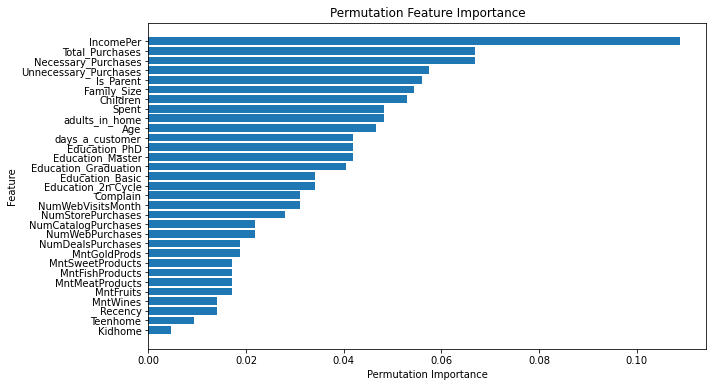

In [131]:
import numpy as np

def permutation_importance(model, X, y, metric, n_repeats=5, random_state=None):
    baseline = metric(model, X, y)
    scores = []
    rng = np.random.RandomState(random_state)
    for col in range(X.shape[1]):
        X_permuted = X.copy()
        X_permuted[:, col] = rng.permutation(X_permuted[:, col])
        score = metric(model, X_permuted, y)
        scores.append(baseline - score)
    return np.array(scores)

# Define a function to calculate accuracy
def calculate_accuracy(model, X, y):
    _, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy

# Calculate permutation feature importance
importance = permutation_importance(model, np.array(X_test2), np.array(y_test2), calculate_accuracy)

# Plot the results
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_indices], align='center')
plt.yticks(range(len(importance)), feature_names)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()


In [107]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train2, y_train2)

# Predicting on the test data
y_pred = lr.predict(X_test2)

print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       319
           1       0.91      0.72      0.80       324

    accuracy                           0.82       643
   macro avg       0.84      0.83      0.82       643
weighted avg       0.84      0.82      0.82       643



In [109]:
X=X_classification2.copy()
X['Total_Promos']=Y_classification2['Total_Promos']
X1=X[(X['Total_Promos']==0)].copy()
X2=X[(X['Total_Promos']==1)].copy()
X2.describe()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,adults_in_home,Spent,Children,Family_Size,Is_Parent,Unnecessary_Purchases,Necessary_Purchases,Total_Purchases,IncomePer,Total_Promos
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0
mean,0.297342,0.392027,44.242525,537.644518,35.373754,274.740864,51.727575,38.056478,59.820598,2.219269,...,1.596346,997.363787,0.689369,2.285714,0.534884,635.521595,361.842193,18.023256,34851.347370,1.0
std,0.471793,0.527894,29.303240,406.105053,44.596227,272.048449,63.096990,47.655308,57.707142,1.924990,...,0.491038,684.471888,0.737527,0.916531,0.499196,438.822210,340.894317,6.800175,24076.266862,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,12.000000,0.000000,1.000000,0.000000,5.000000,2.000000,2.000000,1412.000000,1.0
25%,0.000000,0.000000,19.000000,158.250000,3.000000,45.000000,4.000000,2.000000,19.000000,1.000000,...,1.000000,327.750000,0.000000,2.000000,0.000000,217.000000,57.000000,14.000000,15636.625000,1.0
50%,0.000000,0.000000,40.000000,508.500000,19.000000,159.000000,23.000000,18.000000,37.500000,1.000000,...,2.000000,1025.500000,1.000000,2.000000,1.000000,622.500000,249.000000,19.000000,28544.416667,1.0
75%,1.000000,1.000000,69.000000,896.750000,48.000000,446.750000,80.000000,55.000000,80.000000,3.000000,...,2.000000,1574.000000,1.000000,3.000000,1.000000,1002.500000,606.750000,23.000000,42453.000000,1.0
max,2.000000,2.000000,99.000000,1493.000000,193.000000,981.000000,253.000000,198.000000,242.000000,11.000000,...,2.000000,2525.000000,3.000000,5.000000,1.000000,1689.000000,1258.000000,35.000000,102692.000000,1.0


In [110]:
X1.describe()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,adults_in_home,Spent,Children,Family_Size,Is_Parent,Unnecessary_Purchases,Necessary_Purchases,Total_Purchases,IncomePer,Total_Promos
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.0
mean,0.496887,0.548568,50.862391,218.106476,22.896015,126.619552,32.204234,22.945205,37.770859,2.361146,...,1.665629,460.542341,1.045455,2.711083,0.782067,278.822540,181.719801,13.706725,21107.506496,0.0
std,0.549984,0.544420,28.597416,259.071244,37.195665,188.392648,50.013076,37.568539,47.638355,1.923220,...,0.471917,495.547632,0.731014,0.873972,0.412970,302.683284,243.619498,7.656442,15896.075741,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,815.666667,0.0
25%,0.000000,0.000000,27.000000,18.000000,1.000000,12.000000,2.000000,1.000000,6.000000,1.000000,...,1.000000,55.250000,1.000000,2.000000,1.000000,32.000000,21.000000,7.000000,11217.375000,0.0
50%,0.000000,1.000000,51.000000,98.500000,6.000000,46.000000,10.000000,7.000000,18.000000,2.000000,...,2.000000,235.000000,1.000000,3.000000,1.000000,143.500000,65.000000,12.000000,16495.333333,0.0
75%,1.000000,1.000000,76.000000,365.000000,26.000000,161.000000,38.000000,26.000000,48.750000,3.000000,...,2.000000,817.750000,1.000000,3.000000,1.000000,478.750000,259.750000,20.000000,25147.250000,0.0
max,2.000000,2.000000,99.000000,1396.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,2.000000,2440.000000,3.000000,5.000000,1.000000,1493.000000,1727.000000,44.000000,153924.000000,0.0


In [132]:
#'Education_2n Cycle','Education_Basic','Education_Graduation','Education_Master','Education_Master', 'IncomePer', 'Kidhome','adults_in_home','Teenhome','Age','Spent','Children','Family_Size','Is_Parent', 
                     #'Total_Purchases'
#'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
selected_attributes = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain','Spent','Unnecessary_Purchases', 'Necessary_Purchases', 'Total_Purchases']
data_cluster = df[selected_attributes].copy()

In [133]:
#Scaling
scaler = StandardScaler()
scaler.fit(data_cluster)
data_cluster = pd.DataFrame(scaler.transform(data_cluster),columns= data_cluster.columns )
scaler.fit(df_cluster)
data_cluster = pd.DataFrame(scaler.transform(df_cluster),columns= df_cluster.columns )

print("All features are now scaled")

All features are now scaled


In [134]:
data_cluster.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,adults_in_home,Spent,Children,Family_Size,Is_Parent,Total_Promos,Unnecessary_Purchases,Necessary_Purchases,Total_Purchases,IncomePer
0,-0.018652,0.287689,-0.824004,-0.929587,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,...,-1.353059,1.676120,-1.265454,-1.761762,-1.582644,0.619071,1.145162,2.018365,1.318232,1.709835
1,-1.050899,-0.260057,1.038228,0.907950,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,...,-1.353059,-0.962274,1.403240,0.447193,0.631854,-0.502265,-0.942814,-0.778434,-1.157591,-0.483242
2,-0.444800,0.913505,-0.824004,-0.929587,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,...,0.739066,0.280592,-1.265454,-0.657284,-1.582644,-0.502265,0.297333,0.197112,0.797006,0.562618
3,0.184100,-1.174887,1.038228,-0.929587,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,...,0.739066,-0.919130,0.068893,0.447193,0.631854,-0.502265,-0.940181,-0.690705,-0.896978,-0.820552
4,-0.080279,0.294887,1.038228,-0.929587,1.553545,-0.391748,0.420464,-0.218509,0.155277,-0.001587,...,0.739066,-0.306824,0.068893,0.447193,0.631854,-0.502265,-0.424111,-0.083621,0.536393,-0.278627


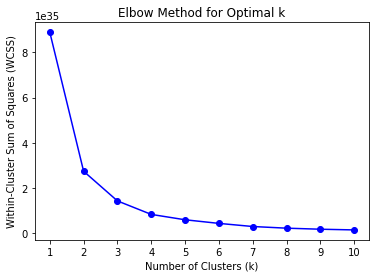

In [135]:
from sklearn.cluster import KMeans

k_values = range(1, 11) 

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Iterate over each value of k
for k in k_values:
    # Initialize the k-means clustering algorithm with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the subset data
    kmeans.fit(df_cluster)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

In [136]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(data_cluster)
labels = kmeans.labels_
data_cluster["Clusters"] = labels
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= labels

In [138]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_cluster)
data_cluster["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

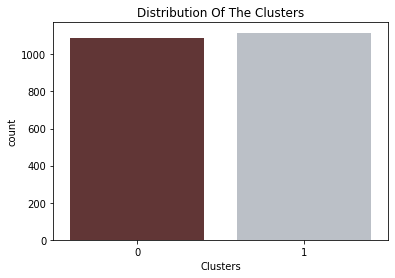

In [140]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

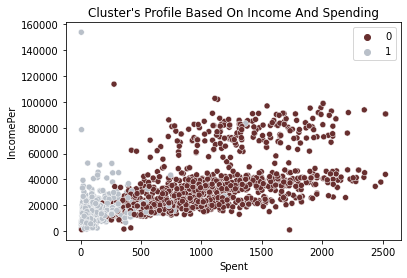

In [141]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["IncomePer"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

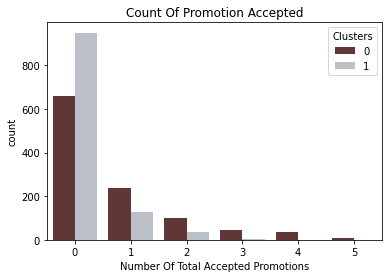

In [142]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

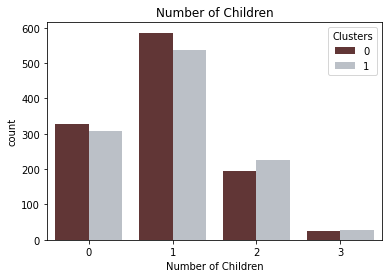

In [159]:
plt.figure()
pl = sns.countplot(x=df["Children"],hue=df["Clusters"], palette= pal)
pl.set_title("Number of Children")
pl.set_xlabel("Number of Children")
plt.show()

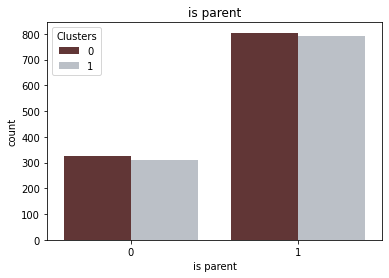

In [160]:
plt.figure()
pl = sns.countplot(x=df["Is_Parent"],hue=df["Clusters"], palette= pal)
pl.set_title("is parent")
pl.set_xlabel("is parent")
plt.show()

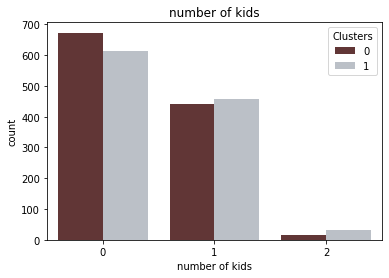

In [161]:
plt.figure()
pl = sns.countplot(x=df["Kidhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of kids")
pl.set_xlabel("number of kids")
plt.show()

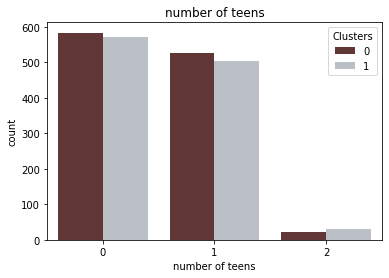

In [162]:
plt.figure()
pl = sns.countplot(x=df["Teenhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of teens")
pl.set_xlabel("number of teens")
plt.show()

In [154]:
import pandas as pd

cluster_means = df.groupby("Clusters").mean()

# Print cluster means
#print("Cluster means:")
#print(cluster_means)
cluster_means = pd.DataFrame(cluster_means)
print(cluster_means)

                   ID        Income   Kidhome  Teenhome    Recency  \
Clusters                                                             
0         5640.975252  67447.745188  0.150321  0.520623  48.493126   
1         5529.403760  36800.182632  0.727842  0.491495  49.608774   

            MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Clusters                                                            
0         547.170486  47.122823       307.478460        67.161320   
1          68.914951   5.957923        29.799463         8.582811   

          MntSweetProducts  ...  adults_in_home        Spent  Children  \
Clusters                    ...                                          
0                48.840513  ...        1.630614  1088.377635  0.670944   
1                 5.796777  ...        1.662489   136.637422  1.219338   

          Family_Size  Is_Parent  Total_Promos  Unnecessary_Purchases  \
Clusters                                                                

In [163]:
df_cluster=df.copy()
selected_attributes = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain','Spent','Unnecessary_Purchases', 'Necessary_Purchases', 'Total_Purchases','Clusters','Income','ID','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [164]:
df_cluster_dict = {0:0 ,1:1,2:1,3:1,4:1,5:1}
df_cluster['Total_Promos'] = df_cluster['Total_Promos'].map(lambda x : X_classification2_dict.get(x))
Y_cluster=pd.DataFrame(df_cluster['Clusters'])
df_cluster= df_cluster.drop(selected_attributes, axis=1)
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster=model_selection.train_test_split(df_cluster,Y_cluster,test_size=0.2, random_state=42)
Y_classification2['Total_Promos'].value_counts()
X_train_cluster=prp.fit_transform(X_train_cluster)
X_test_cluster=prp.transform(X_test_cluster)

In [165]:
feature_names2= df_cluster.columns.tolist()
print(feature_names2)

['Kidhome', 'Teenhome', 'Recency', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'days_a_customer', 'Age', 'adults_in_home', 'Children', 'Family_Size', 'Is_Parent', 'Total_Promos', 'IncomePer']


In [166]:
X_train_cluster = pd.DataFrame(X_train_cluster)
X_test_cluster = pd.DataFrame(X_test_cluster)

optimizer = SGD(learning_rate=0.1, momentum=0.9)  

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_cluster.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 unit for binary classification
])

# Define class weight
class_weight = {0: 0.6304, 1: 2.4157}

# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cluster, y_train_cluster, class_weight='balanced', epochs=45, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cluster, y_test_cluster)
print(f'Test accuracy: {test_accuracy}')

Train on 1412 samples, validate on 354 samples
Epoch 1/45
1412/1412 [==============================] - 0s 161us/sample - loss: 0.4428 - acc: 0.7875 - val_loss: 0.4211 - val_acc: 0.8446
Epoch 2/45
1412/1412 [==============================] - 0s 53us/sample - loss: 0.3187 - acc: 0.8690 - val_loss: 0.3517 - val_acc: 0.8870
Epoch 3/45
1412/1412 [==============================] - 0s 52us/sample - loss: 0.2935 - acc: 0.8746 - val_loss: 0.3284 - val_acc: 0.8927
Epoch 4/45
1412/1412 [==============================] - 0s 52us/sample - loss: 0.2554 - acc: 0.8994 - val_loss: 0.2882 - val_acc: 0.8983
Epoch 5/45
1412/1412 [==============================] - 0s 52us/sample - loss: 0.2772 - acc: 0.8846 - val_loss: 0.3259 - val_acc: 0.8870
Epoch 6/45
1412/1412 [==============================] - 0s 48us/sample - loss: 0.2536 - acc: 0.9065 - val_loss: 0.3662 - val_acc: 0.8644
Epoch 7/45
1412/1412 [==============================] - 0s 50us/sample - loss: 0.2391 - acc: 0.9108 - val_loss: 0.3144 - val_acc: 

In [168]:
feature_names2 = df_cluster.columns.tolist()
print(feature_names2)

['Kidhome', 'Teenhome', 'Recency', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'days_a_customer', 'Age', 'adults_in_home', 'Children', 'Family_Size', 'Is_Parent', 'Total_Promos', 'IncomePer']


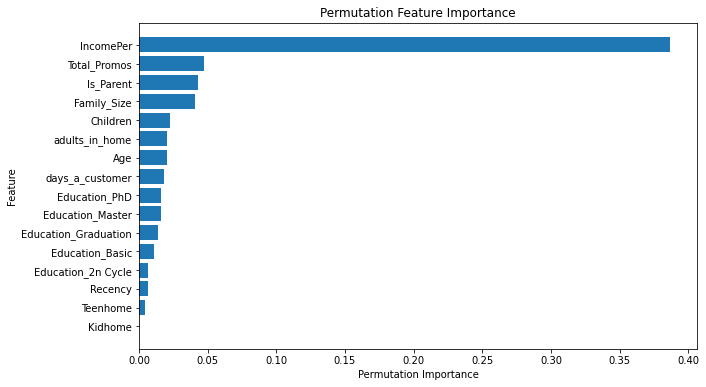

In [169]:
def permutation_importance(model, X, y, metric, n_repeats=5, random_state=None):
    baseline = metric(model, X, y)
    scores = []
    rng = np.random.RandomState(random_state)
    for col in range(X.shape[1]):
        X_permuted = X.copy()
        X_permuted[:, col] = rng.permutation(X_permuted[:, col])
        score = metric(model, X_permuted, y)
        scores.append(baseline - score)
    return np.array(scores)

# Define a function to calculate accuracy
def calculate_accuracy(model, X, y):
    _, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy

# Calculate permutation feature importance
importance = permutation_importance(model, np.array(X_test_cluster), np.array(y_test_cluster), calculate_accuracy)

# Plot the results
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_indices], align='center')
plt.yticks(range(len(importance)), feature_names2)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()
